# Исследование данных интернет-магазина "Стримчик"
## Описание проекта
Интернет-магазин "Стримчик" продает по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
## Описание данных
Имеем данные до 2016 года. Нужно спланировать компанию на 2017-й.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.
## Примерный план действий
1. Открыть файл с данными и изучить общую информацию.
2. Подготовить данные.
3. Провести исследовательский анализ данных:
* Посмотреть, сколько игр выпускалось в разные годы;
* Посмотреть, как менялись продажи по платформам;
* Определить актуальные период, данные за который помогут построить прогноз на 2017 год;
* Выбрать несколько потенциально прибыльных платформ;
* Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам;
* Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
* Соотнести выводы с продажами игр на других платформах;
* Посмотреть на общее распределение игр по жанрам;
4. Составить портрет пользователя каждого региона.
5. Проверить гипотезы.
6. Написать общий вывод.

**Шаг 1. Изучение общей информации**

Импортируем библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn
from matplotlib import pyplot as plt
import matplotlib
import scipy.stats as st

Считываем данные из csv-файла в датафрейм и сохраняем в переменную `data`.

In [2]:
data = pd.read_csv('games.csv')

Выведем первые 20 строчек датафрейма `data` на экран.

In [3]:
display(data.head(20))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведем основную информацию о датафрейме с помощью метода `info()`.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Вывод:** есть пропуски в данных. В столбцах `Year_of_Release` и `User_Score` можно заменить тип данных на `int` и `float` соответственно.

**Шаг 2. Подготовка данных**

* Заменим названия столбцов (приведем к нижнему регистру).

In [5]:
data.columns = data.columns.str.lower()

* Преобразуем данные в нужные типы. В столбце `year_of_release` заменяем тип `float64` на `int`, потому что год не может быть нецелым.

In [6]:
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')

* Обработаем пропуски:
1. В столбцах `name` и `genre` по 2 пропуска. Проверим не в одних и теж же строках ли.
2. В столбце `year_of_release` не будем заполнять пропуски, потому что выбирая актуальный период, сможем просто избавиться от строк с пропусками.
3. В столбцах `critic_score` и `user_score` не будем заполнять пропуски, потому что качественно это сделать невозможно.
4. В столбце `rating`, вероятно, пропуск означает то, что ассоциация ESRB не определила рейтинг компьютерной игры и не присваивоила ей подходящую возрастную категорию. Заполнять не будем, мы же не ESRB).

In [7]:
data.loc[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, пропуски в столбцах `name` и `genre` соответствуют одним и тем же строкам. Удалим их. На датасет это не повлияет, потому что, во-первых, строки всего 2 к 16715 строк данных, во-вторых, почти половина колонок содержит пропущенные значения, а, в-третьих данные за 1993 год мало актуальны и ценны.

In [8]:
data = data.dropna(subset=['name'])

Причины, которые могли привести к пропускам в столбцах:
1. `name`, `year_of_release`, `genre` - технологические ошибки;
2. `critic_score` и `user_score` - отсутствие оценок вовсе.

Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Выведем кол-во строк с этим значением.

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2424

Посмотрим на такие строки.

In [10]:
data.loc[data['user_score'] == 'tbd'].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


Никакой закономерности между значением `tbd` в столбце `user_score` и значениями в других столбцах не наблюдается. Вероятно, оно расшифровывается "To Be Determined" и означает, что оценка пользователей еще не определена. Заменим на пропуски.

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = None

В столбце `user_score` заменим тип `object` на `float`, потому что оценка пользователей - это количественная переменная.

In [12]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

* Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Проверим наличие в таблице полных дубликатов строк.

In [14]:
data.duplicated().sum()

0

Проверим данные на неполные дубликаты. Посмотрим есть ли строки с одинаковым названием игры, платформой и годом выпуска.

In [15]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Есть один дубликат, удалим его.

In [16]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

**Вывод:** данные подготовлены, приступаем к исследовательскому анализу данных.

**Шаг 3. Исследовательский анализ данных**

* Посмотрим, сколько игр выпускалось в разные годы.

In [17]:
data_year = data.groupby('year_of_release')['name'].count()
data_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

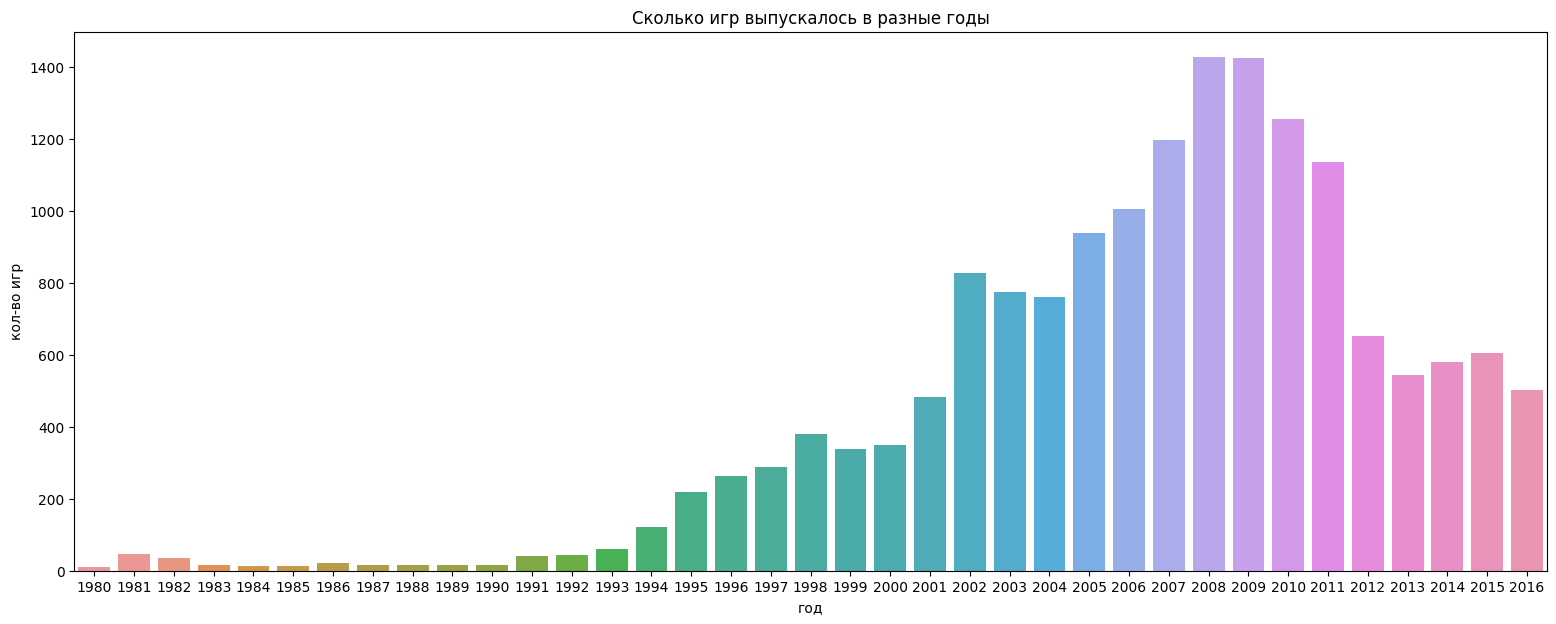

In [18]:
matplotlib.rcParams['figure.figsize'] = [19,7]
seaborn.barplot(x=data_year.index, y=data_year)
plt.title('Сколько игр выпускалось в разные годы')
plt.xlabel('год')
plt.ylabel('кол-во игр')
plt.show()

**Вывод:** кол-во игр в разные годы сильно отличается. Пик приходится на 2008-2009 года. Есть периоды, которыми можно пренебречь.

* Посмотрим, как менялись продажи по платформам. Для начала выберем платформы с наибольшими суммарными продажами.

In [19]:
data_platform = data.groupby('platform')['total_sales'].sum().sort_values()
data_platform

platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.86
DC        15.95
GEN       28.35
SAT       33.59
PSV       54.07
WiiU      82.19
2600      96.98
XOne     159.32
GC       198.93
SNES     200.04
N64      218.68
NES      251.05
GB       255.46
XB       257.74
3DS      259.00
PC       259.52
PSP      294.05
PS4      314.14
GBA      317.85
PS       730.86
DS       806.12
Wii      907.51
PS3      939.64
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

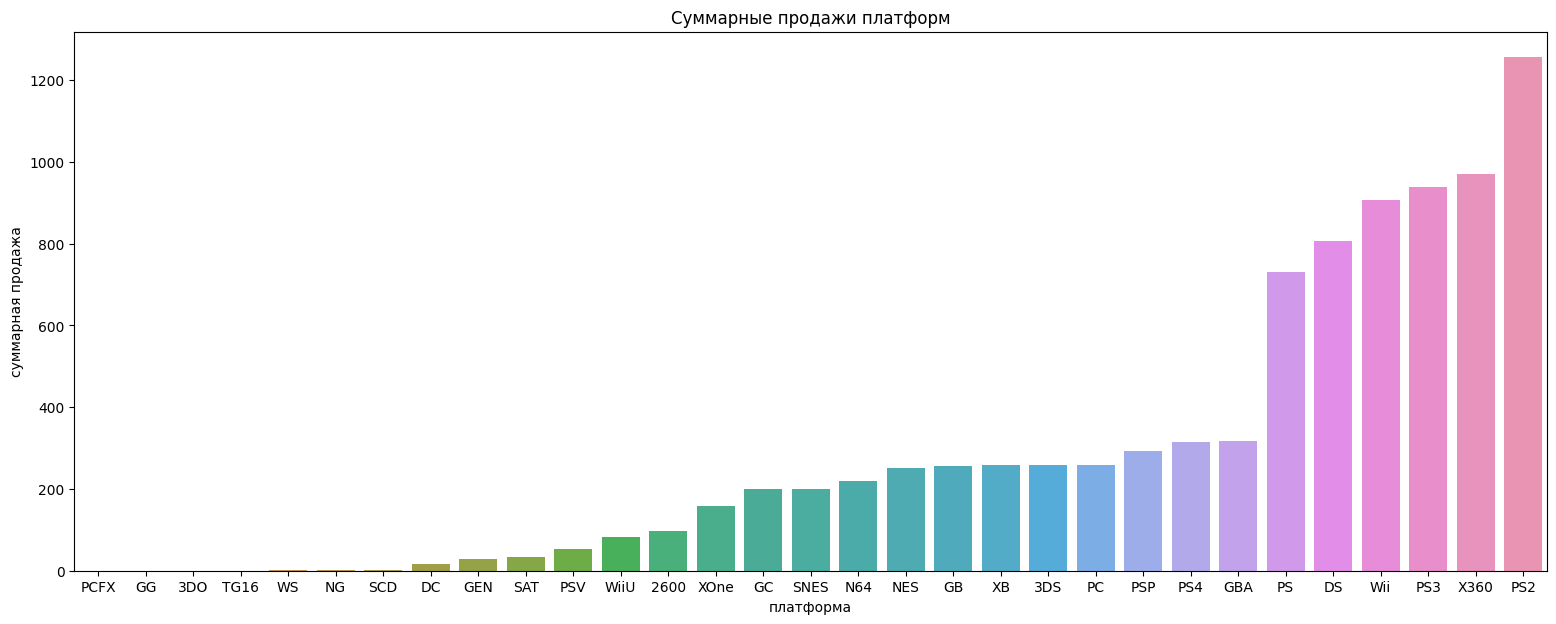

In [20]:
seaborn.barplot(x=data_platform.index, y=data_platform)
plt.title('Суммарные продажи платформ')
plt.xlabel('платформа')
plt.ylabel('суммарная продажа')
plt.show()

В ТОП-3 платформ входят PS2, X360, PS3. Построим для них распределение по годам.

In [21]:
data_ps2 = data.query('platform == "PS2"').groupby('year_of_release')['total_sales'].sum()
data_ps2

year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    103.42
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64

In [22]:
data_x360 = data.query('platform == "X360"').groupby('year_of_release')['total_sales'].sum()
data_x360

year_of_release
2005      8.25
2006     51.62
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64

In [23]:
data_ps3 = data.query('platform == "PS3"').groupby('year_of_release')['total_sales'].sum()
data_ps3

year_of_release
2006     20.96
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.35
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64

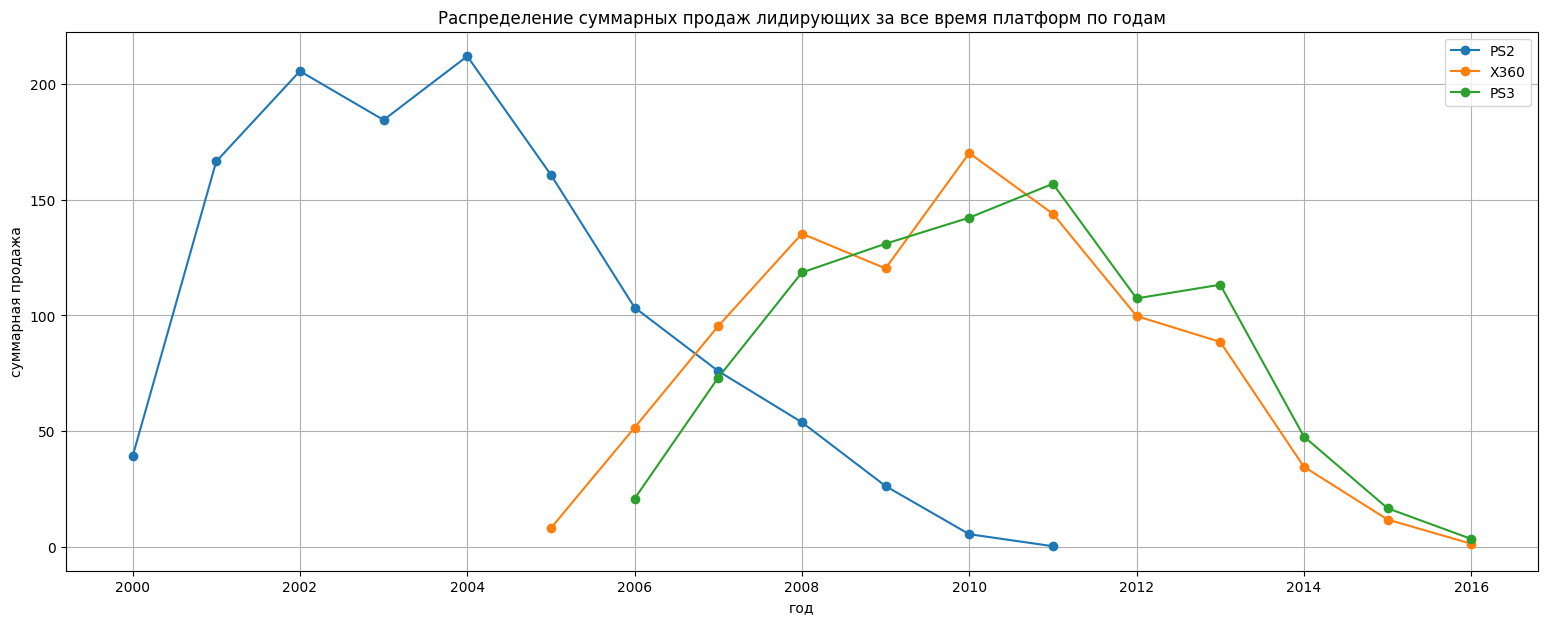

In [24]:
data_ps2.plot(
    style='o-',
    label='PS2',
    legend=True
)
data_x360.plot(
    style='o-',
    label='X360',
    legend=True
)
data_ps3.plot(
    label='PS3',
    style='o-',
    legend=True,
    grid=True
)

plt.title('Распределение суммарных продаж лидирующих за все время платформ по годам')
plt.xlabel('год')
plt.ylabel('суммарная продажа')
plt.show()

**Вывод:** платформы живут примерно 12 лет, при этом растут и развиваются 6 лет.

* Возьмем данные за актуальный период. Чтобы в датафрейм не попали платформы и игры, которые в 2017 году уже точно существовать не будут, и не смещали анализ и выявленные зависимости в пользу исторических данных, признаем актуальным период с 2012 года. Отфильтруем данные.

In [25]:
data = data.loc[data['year_of_release'] >= 2012]
data.groupby('year_of_release')['name'].count()

year_of_release
2012    652
2013    544
2014    581
2015    606
2016    502
Name: name, dtype: int64

* Определим, какие платформы лидируют по продажам на 2016 год.

In [26]:
data_2016 = data.loc[data['year_of_release'] == 2016].groupby('platform')['total_sales'].sum().sort_values()
data_2016

platform
Wii      0.18
X360     1.52
PS3      3.60
PSV      4.25
WiiU     4.60
PC       5.25
3DS     15.14
XOne    26.15
PS4     69.25
Name: total_sales, dtype: float64

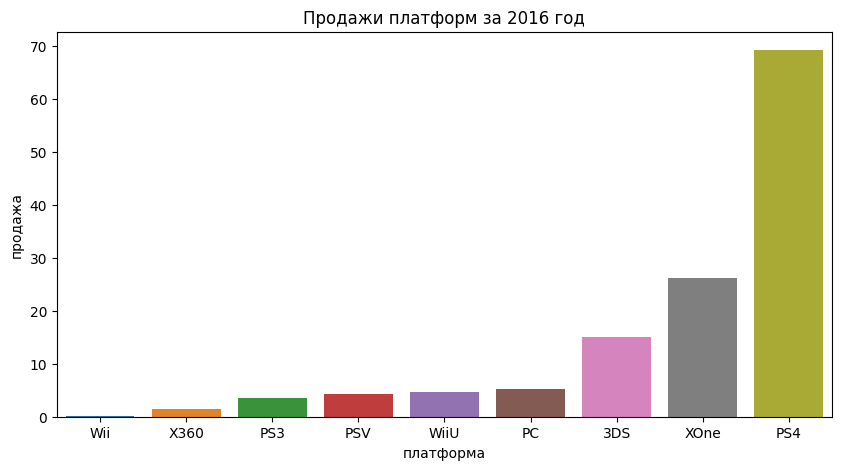

In [27]:
matplotlib.rcParams['figure.figsize'] = [10,5]
seaborn.barplot(x=data_2016.index, y=data_2016)
plt.title('Продажи платформ за 2016 год')
plt.xlabel('платформа')
plt.ylabel('продажа')
plt.show()

В ТОП-5 платформ 2016 года попадают PS4, XOne, 3DS, PC, WiiU. Проверим, растут они или падают.

In [28]:
data_ps4 = data.query('platform == "PS4"').groupby('year_of_release')['total_sales'].sum()
data_ps4

year_of_release
2013     25.99
2014    100.00
2015    118.90
2016     69.25
Name: total_sales, dtype: float64

In [29]:
data_xone = data.query('platform == "XOne"').groupby('year_of_release')['total_sales'].sum()
data_xone

year_of_release
2013    18.96
2014    54.07
2015    60.14
2016    26.15
Name: total_sales, dtype: float64

In [30]:
data_3ds = data.query('platform == "3DS"').groupby('year_of_release')['total_sales'].sum()
data_3ds

year_of_release
2012    51.36
2013    56.57
2014    43.76
2015    27.78
2016    15.14
Name: total_sales, dtype: float64

In [31]:
data_pc = data.query('platform == "PC"').groupby('year_of_release')['total_sales'].sum()
data_pc

year_of_release
2012    23.22
2013    12.38
2014    13.28
2015     8.52
2016     5.25
Name: total_sales, dtype: float64

In [32]:
data_wiiu = data.query('platform == "WiiU"').groupby('year_of_release')['total_sales'].sum()
data_wiiu

year_of_release
2012    17.56
2013    21.65
2014    22.03
2015    16.35
2016     4.60
Name: total_sales, dtype: float64

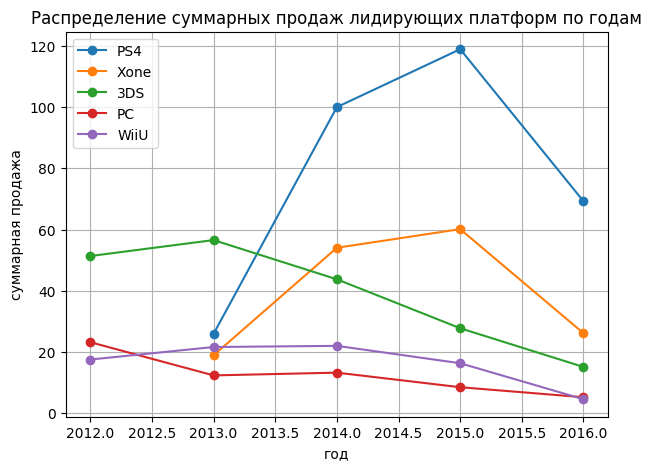

In [33]:
data_ps4.plot(
    style='o-',
    label='PS4',
    legend=True,
    figsize=(7, 5)
)
data_xone.plot(
    style='o-',
    label='Xone',
    legend=True
)
data_3ds.plot(
    label='3DS',
    style='o-',
    legend=True
)
data_pc.plot(
    label='PC',
    style='o-',
    legend=True
)
data_wiiu.plot(
    label='WiiU',
    style='o-',
    legend=True,
    grid=True
)

plt.title('Распределение суммарных продаж лидирующих платформ по годам')
plt.xlabel('год')
plt.ylabel('суммарная продажа')
plt.show()

**Вывод:** данные за 2016 год неполные, поэтому на спад всех платформ в 2016 году не стоит обращать внимания. Оценим тенденции за предыдущие годы и сделаем вывод. Так, платформы PS4 и Xone росли с 2013 по 2015 год. Логично предположить, что их продажи вырастут в 2016 и 2017 годах. Отнесем их к потенциально прибыльным. Остальные платформы еще в предыдущие годы падали, скорее всего, они находятся на стадии спада и больше не вырастут.

* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

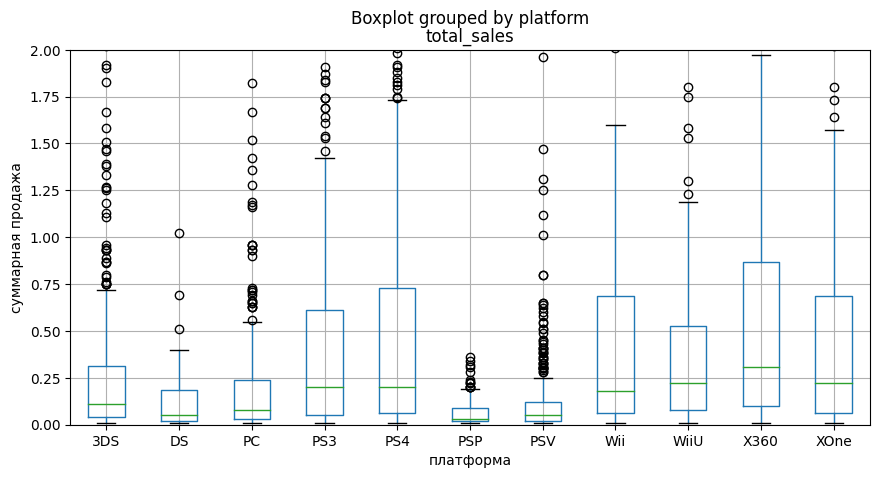

In [34]:
data.boxplot(column='total_sales', by='platform')
plt.ylim(0, 2)
plt.xlabel('платформа')
plt.ylabel('суммарная продажа')
plt.show()

**Вывод:** нижние "усы" везде приближены к 0, минимальному значению. Верхние имеют очень различающиеся значения. Так, платформы X360, PS4, Wii, XOne, PS3 имеют относительно высокую границу нормального размаха, больше 1.25 млн. проданных копий. В их число входят и потенциально прибыльные платформы для 2017 года - PS4 и XOne. Кол-во выбросов для разных платформ также различается. Наибольше кол-во выбросов замечено для платформ PSV, PC, 3DS.

* Посмотрим, как влияют на продажи внутри популярной платформы PS4 отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Корреляция =  -0.031957110204556424


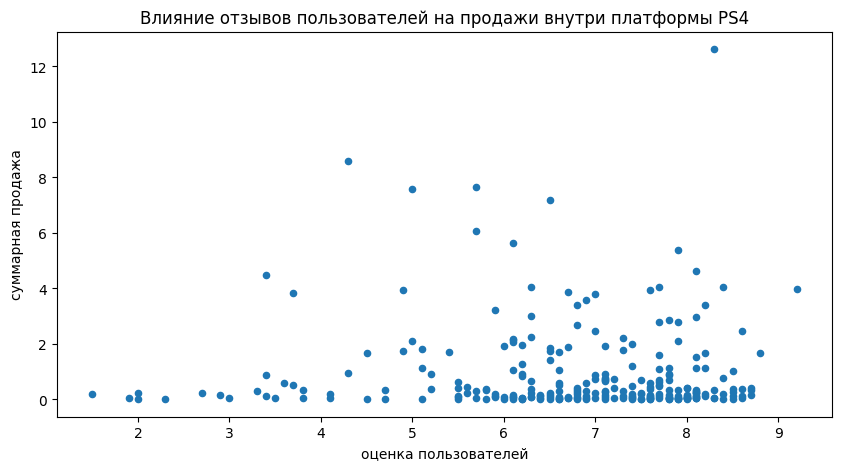

In [35]:
data.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи внутри платформы PS4')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарная продажа')

print('Корреляция = ', data.query('platform == "PS4"')['user_score'].corr(data.query('platform == "PS4"')['total_sales']))

Корреляция =  0.40656790206178095


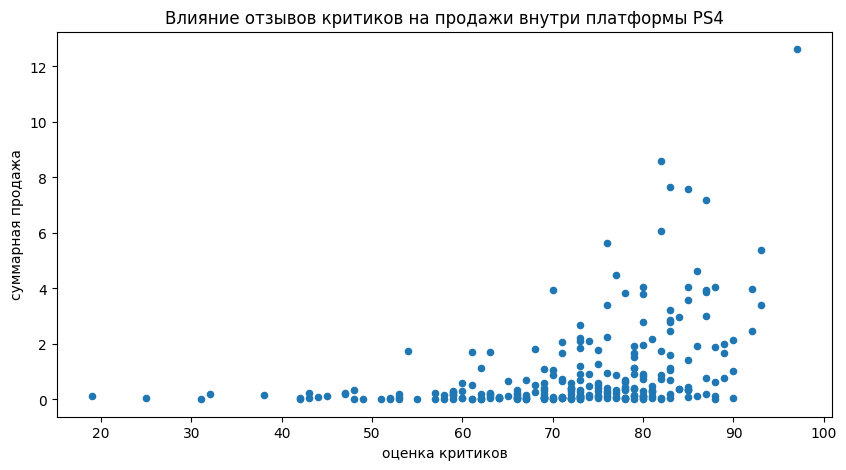

In [36]:
data.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние отзывов критиков на продажи внутри платформы PS4')
plt.xlabel('оценка критиков')
plt.ylabel('суммарная продажа')

print('Корреляция = ', data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['total_sales']))

**Вывод:** между отзывами пользователей и продажами на платформе PS4 связи нет, а вот между отзывами критиков и продажами - связь есть, хотя и не слишком сильная.

* Рассмотрим влияние отзывов пользователей и критиков на продажи внутри других платформ: XOne и 3DS.

Корреляция =  -0.06892505328279414


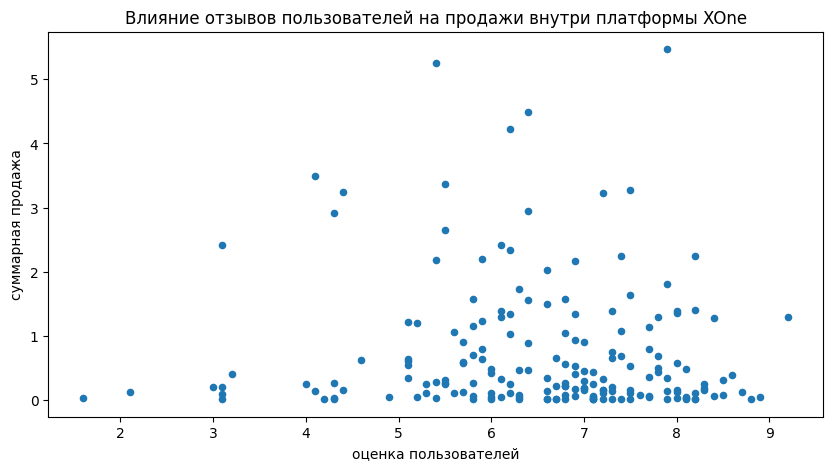

In [37]:
data.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи внутри платформы XOne')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарная продажа')

print('Корреляция = ', data.query('platform == "XOne"')['user_score'].corr(data.query('platform == "XOne"')['total_sales']))

Корреляция =  0.4169983280084017


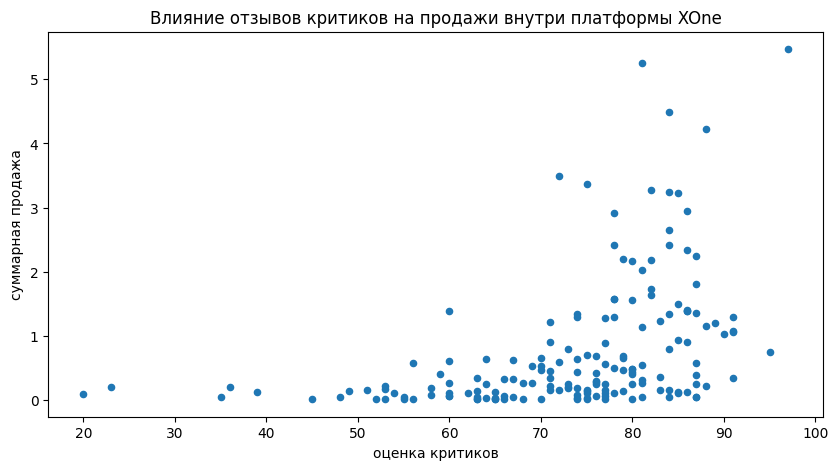

In [38]:
data.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние отзывов критиков на продажи внутри платформы XOne')
plt.xlabel('оценка критиков')
plt.ylabel('суммарная продажа')

print('Корреляция = ', data.query('platform == "XOne"')['critic_score'].corr(data.query('platform == "XOne"')['total_sales']))

Корреляция =  0.19758263411038599


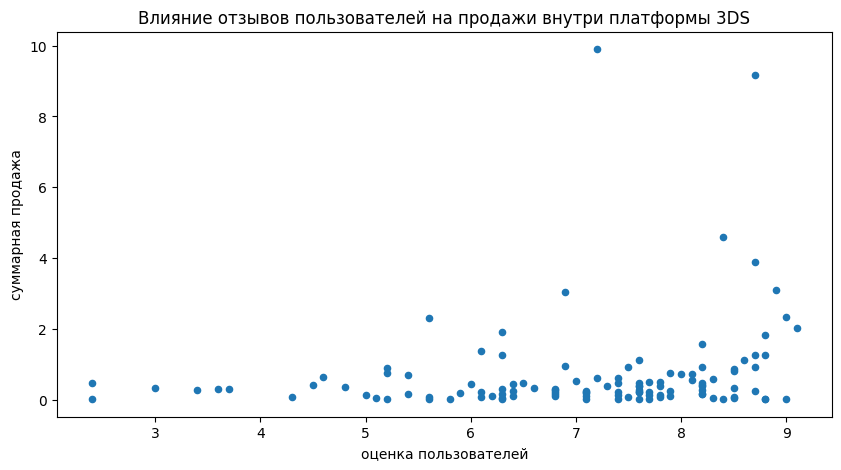

In [39]:
data.query('platform == "3DS"').plot(x='user_score', y='total_sales', kind='scatter')
plt.title('Влияние отзывов пользователей на продажи внутри платформы 3DS')
plt.xlabel('оценка пользователей')
plt.ylabel('суммарная продажа')

print('Корреляция = ', data.query('platform == "3DS"')['user_score'].corr(data.query('platform == "3DS"')['total_sales']))

Корреляция =  0.3208028695360785


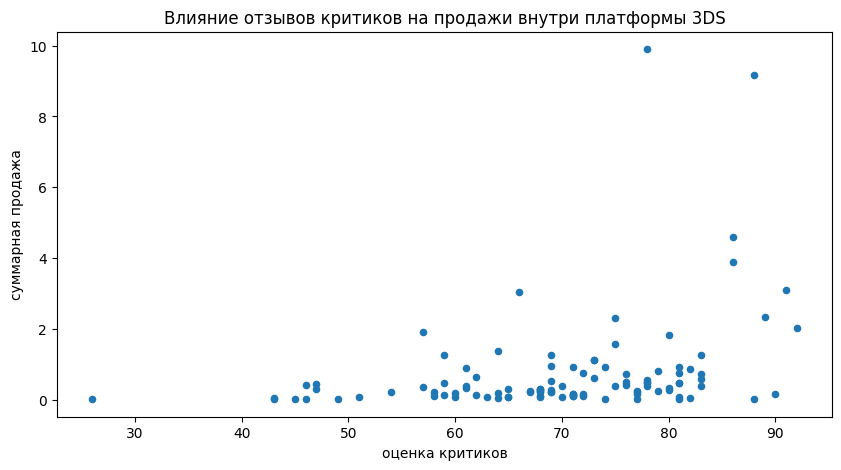

In [40]:
data.query('platform == "3DS"').plot(x='critic_score', y='total_sales', kind='scatter')
plt.title('Влияние отзывов критиков на продажи внутри платформы 3DS')
plt.xlabel('оценка критиков')
plt.ylabel('суммарная продажа')

print('Корреляция = ', data.query('platform == "3DS"')['critic_score'].corr(data.query('platform == "3DS"')['total_sales']))

**Вывод:** на некоторых платформах все же прослеживается небольшая связь между отзывами пользователей и продажами. А связь между отзывами критиков и продажами есть у всех рассмотренных платформ.

* Посмотрим на общее распределение игр по жанрам. Оценим суммарные продажи игр разных жанров и медианные, так как на суммарные продажи большое влияние могут оказывать продажи игр бестселлеров, из-за них общие продажи могут быть максимальными, а вот продажи на одну игру наоборот значительно ниже, чем в других жанрах.

In [41]:
data_genre_count = data.groupby('genre')['name'].count().sort_values()
data_genre_count

genre
Puzzle            28
Strategy          71
Simulation        80
Platform          85
Fighting         109
Racing           115
Misc             192
Shooter          235
Sports           267
Adventure        302
Role-Playing     370
Action          1031
Name: name, dtype: int64

In [42]:
data_genre = data.groupby('genre')['total_sales'].sum().sort_values()
data_genre

genre
Puzzle            4.89
Strategy         13.34
Adventure        29.43
Simulation       35.12
Fighting         44.49
Racing           53.50
Platform         61.00
Misc             85.04
Sports          181.06
Role-Playing    192.80
Shooter         304.73
Action          441.12
Name: total_sales, dtype: float64

In [43]:
data_genre_median = data.groupby('genre')['total_sales'].median().sort_values()
data_genre_median

genre
Adventure       0.030
Puzzle          0.045
Strategy        0.080
Action          0.120
Misc            0.120
Simulation      0.120
Fighting        0.130
Racing          0.140
Role-Playing    0.140
Platform        0.210
Sports          0.240
Shooter         0.440
Name: total_sales, dtype: float64

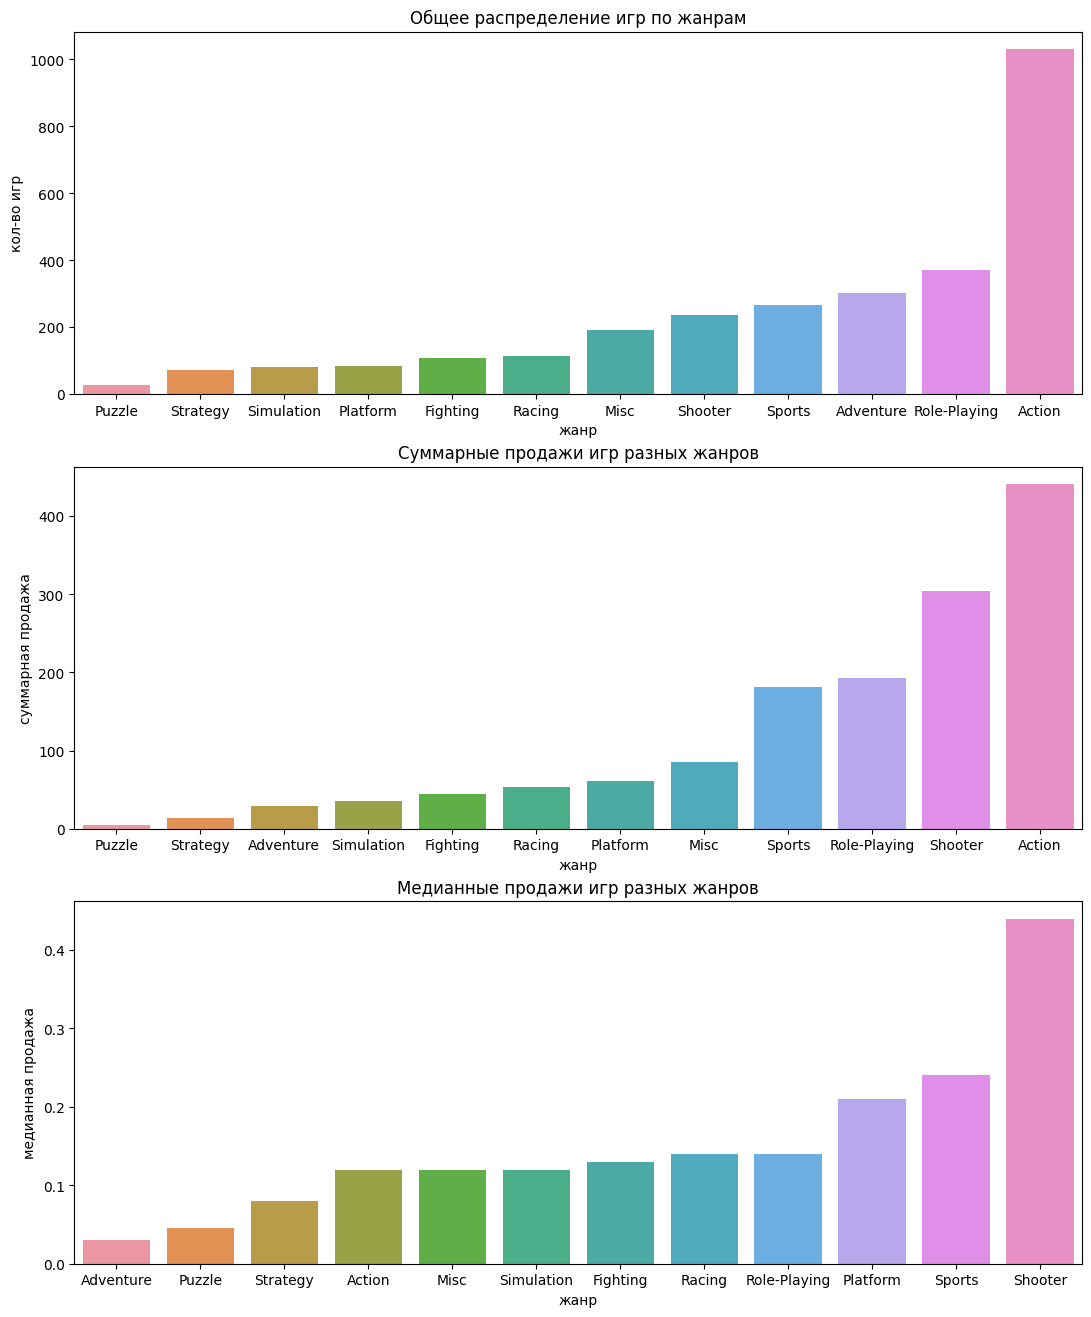

In [44]:
plt.figure(figsize=(13,16))

plt.subplot(311)
seaborn.barplot(x=data_genre_count.index, y=data_genre_count)
plt.title('Общее распределение игр по жанрам')
plt.xlabel('жанр')
plt.ylabel('кол-во игр')

plt.subplot(312)
seaborn.barplot(x=data_genre.index, y=data_genre)
plt.title('Суммарные продажи игр разных жанров')
plt.xlabel('жанр')
plt.ylabel('суммарная продажа')

plt.subplot(313)
seaborn.barplot(x=data_genre_median.index, y=data_genre_median)
plt.title('Медианные продажи игр разных жанров')
plt.xlabel('жанр')
plt.ylabel('медианная продажа')
plt.show()

**Вывод:** большинство игр относится к жанру Action, а меньшинство - к жанру Puzzle. Распределение жанров по суммарным и медианным продажам разное. Так, самые высокие суммарные продажи имеет жанр Action, хотя его медианные продажи малы. А вот жанр Shooter имеет самые высокие медианные продажи и находится на втором месте по суммарным продажам.

**Шаг 4. Составление портрета пользователя каждого региона**

* Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5).

In [45]:
data_na = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
data_na

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64

In [46]:
data_eu = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
data_eu

platform
PS4     141.09
PS3     106.85
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64

In [47]:
data_jp = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
data_jp

platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64

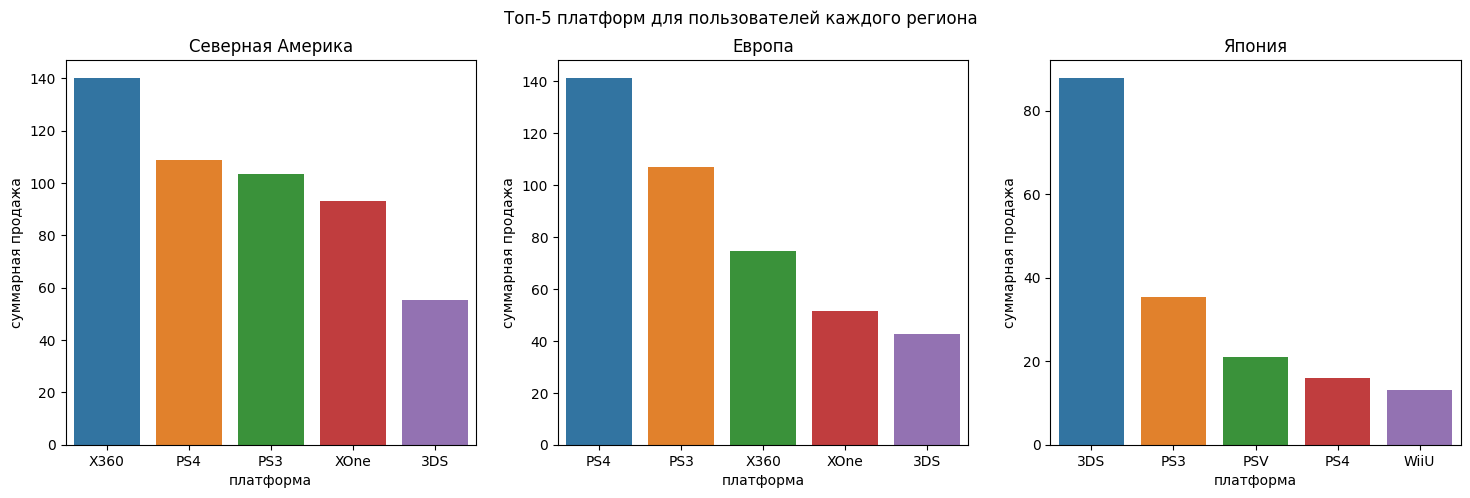

In [48]:
plt.figure(figsize=(18,5))
plt.suptitle('Топ-5 платформ для пользователей каждого региона')

plt.subplot(131)
seaborn.barplot(x=data_na.index, y=data_na)
plt.title('Северная Америка')
plt.xlabel('платформа')
plt.ylabel('суммарная продажа')

plt.subplot(132)
seaborn.barplot(x=data_eu.index, y=data_eu)
plt.title('Европа')
plt.xlabel('платформа')
plt.ylabel('суммарная продажа')

plt.subplot(133)
seaborn.barplot(x=data_jp.index, y=data_jp)
plt.title('Япония')
plt.xlabel('платформа')
plt.ylabel('суммарная продажа')

plt.show()

**Вывод:** в Северной Америке большую долю продаж составляет платформа X360, которая на 3 месте в топ-5 Европы, и которой нет в топ-5 Японии. В Европе большую долю продаж составляет платформа PS4, которая на 2 и 4 месте в топах Северной Америки и Японии соответственно. В Японии платформа 3DS самая популярная, при том, что в Северной Америке и Европе она лишь на 5 месте.

* Определим для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5).

In [49]:
data_na = data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
data_na

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64

In [50]:
data_eu = data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
data_eu

genre
Action          159.34
Shooter         113.47
Sports           69.08
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64

In [51]:
data_jp = data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
data_jp

genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64

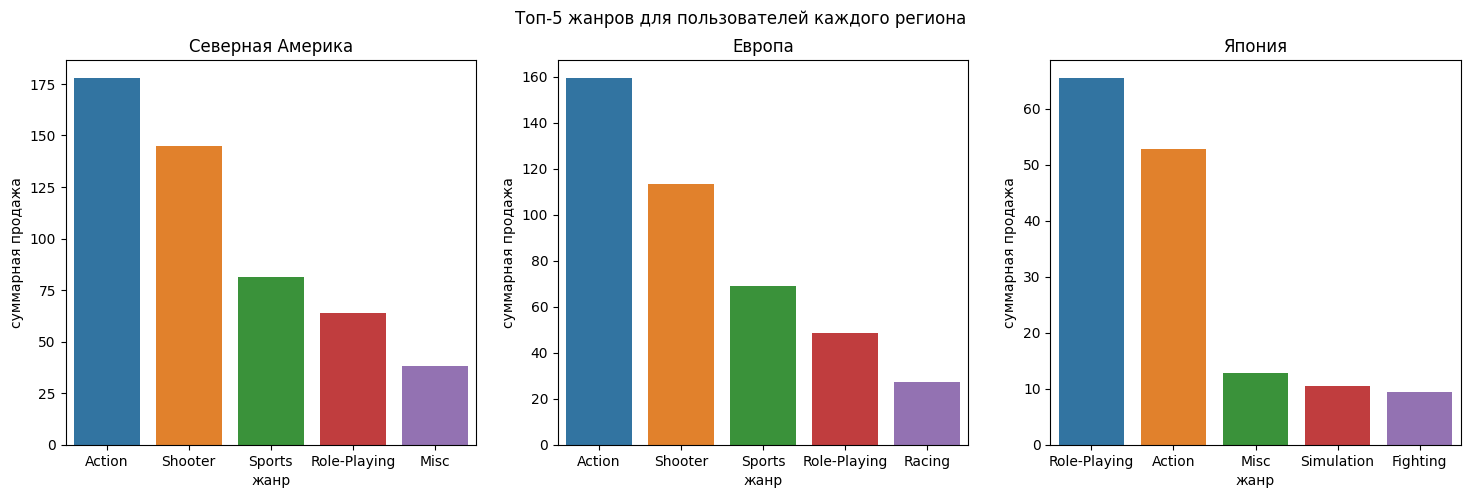

In [52]:
plt.figure(figsize=(18,5))
plt.suptitle('Топ-5 жанров для пользователей каждого региона')

plt.subplot(131)
seaborn.barplot(x=data_na.index, y=data_na)
plt.title('Северная Америка')
plt.xlabel('жанр')
plt.ylabel('суммарная продажа')

plt.subplot(132)
seaborn.barplot(x=data_eu.index, y=data_eu)
plt.title('Европа')
plt.xlabel('жанр')
plt.ylabel('суммарная продажа')

plt.subplot(133)
seaborn.barplot(x=data_jp.index, y=data_jp)
plt.title('Япония')
plt.xlabel('жанр')
plt.ylabel('суммарная продажа')

plt.show()

**Вывод:** предпочтения в жанрах игроков из Северной Америки и Европы очень схожи - в топ-5 попали одни и те же позиции, за исключением последней, в одном и том же порядке и наибольшая популярность достается жанру Action. Японцы несколько отличаются, на первом месте у них Role-Playing, который мало популярен в Северной Америке и Европе.

* Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе. А для начала какие значения хранятся в этом столбце.

In [53]:
data['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

In [54]:
data_na = data.groupby('rating')['na_sales'].sum().sort_values()
data_na

rating
T        66.02
E10+     75.70
E       114.37
M       231.57
Name: na_sales, dtype: float64

In [55]:
data_eu = data.groupby('rating')['eu_sales'].sum().sort_values()
data_eu

rating
T        52.96
E10+     55.37
E       113.02
M       193.96
Name: eu_sales, dtype: float64

In [56]:
data_jp = data.groupby('rating')['jp_sales'].sum().sort_values()
data_jp

rating
E10+     8.19
M       21.20
T       26.02
E       28.33
Name: jp_sales, dtype: float64

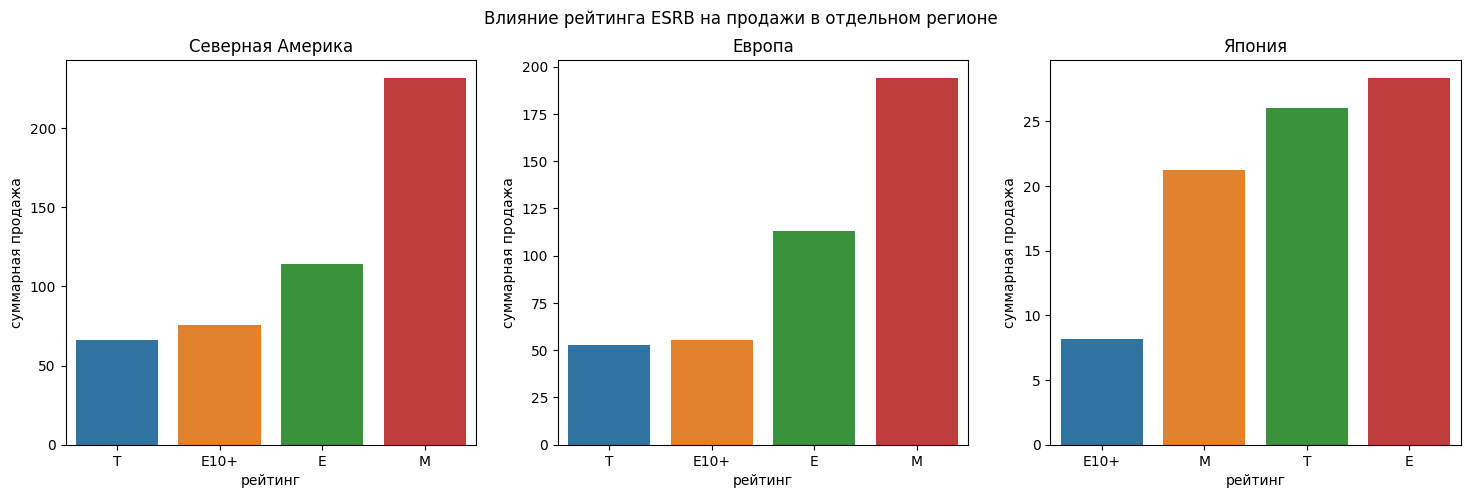

In [57]:
plt.figure(figsize=(18,5))
plt.suptitle('Влияние рейтинга ESRB на продажи в отдельном регионе')

plt.subplot(131)
seaborn.barplot(x=data_na.index, y=data_na)
plt.title('Северная Америка')
plt.xlabel('рейтинг')
plt.ylabel('суммарная продажа')

plt.subplot(132)
seaborn.barplot(x=data_eu.index, y=data_eu)
plt.title('Европа')
plt.xlabel('рейтинг')
plt.ylabel('суммарная продажа')

plt.subplot(133)
seaborn.barplot(x=data_jp.index, y=data_jp)
plt.title('Япония')
plt.xlabel('рейтинг')
plt.ylabel('суммарная продажа')

plt.show()

**Вывод:** определенно рейтинг ESRB влияет на продажи в отдельных регионах. Рейтинг M мотивирует покупать игры больше всего в Северной Америке и Европе, а рейтинг Е - в Японии.

**Шаг 5. Проверка гипотез**

* Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC разные.

In [58]:
alpha = 0.05
results = st.ttest_ind(data.loc[data['platform'] == 'XOne', 'user_score'].dropna(), data.query('platform == "PC"')['user_score'].dropna())
print('p_value =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
print('Средний пользовательский рейтинг платформы Xbox One =', data.query('platform == "XOne"')['user_score'].mean())
print('Средний пользовательский рейтинг платформы PC =', data.query('platform == "PC"')['user_score'].mean())

p_value = 0.5535080500643661
Нет оснований отвергнуть нулевую гипотезу
Средний пользовательский рейтинг платформы Xbox One = 6.521428571428572
Средний пользовательский рейтинг платформы PC = 6.428640776699029


**Вывод:** средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

* Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Нулева гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые. Альтернативная гипотеза: средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [59]:
alpha = 0.05
results = st.ttest_ind(data.query('genre == "Action"')['user_score'].dropna(), data.query('genre == "Sports"')['user_score'].dropna())
print('p_value =', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')
print('Средний пользовательский рейтинг жанра Action =', data.query('genre == "Action"')['user_score'].mean())
print('Средний пользовательский рейтинг жанра Sports =', data.query('genre == "Sports"')['user_score'].mean())

p_value = 4.8045233804629176e-26
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра Action = 6.825047801147227
Средний пользовательский рейтинг жанра Sports = 5.455670103092784


**Вывод:** средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Шаг 6. Общий вывод**

Изучена общая информация, проведена подготовка данных, осуществлен исследовательский анализ, составлены портеты пользователей каждого региона, проверены гипотезы.
Итак, какие определяющие успешность игры закономерности были выявлены:
* Кол-во выпускаемых в разные годы игр сильно отличается. Больше всего игр выпускалось в 2008-2009 годах.
* В ТОП-3 платформ по суммарным продажам за всю историю продажи компьютерных игр входят PS2, X360, PS3. Живут платформы примерно 12 лет, при этом период рост и развития занимает 6 лет.
* Для построения прогноза на 2017 год актуальным можно назвать период с 2012 года.
* В ТОП-5 платформ 2016 года попадают PS4, XOne, 3DS, PC, WiiU. Среди них имеют тенденцию к росту только PS4 и XOne, их можно назвать потенциально прибыльными.
* Между отзывами пользователей и продажами на платформе PS4 связи нет, а вот между отзывами критиков и продажами - связь есть, хотя и не слишком сильная.
* Что касается других платформ, на некоторых все же прослеживается небольшая связь между отзывами пользователей и продажами. А связь между отзывами критиков и продажами есть у всех рассмотренных платформ.
* Большинство игр относится к жанру Action, а меньшинство - к жанру Puzzle. Распределение жанров по суммарным и медианным продажам разное. Так, самые высокие суммарные продажи имеет жанр Action, хотя его медианные продажи малы. А вот жанр Shooter имеет самые высокие медианные продажи и находится на втором месте по суммарным продажам.

Портрет пользователя Северной Америки:
* топ-5 популярных платформ
1. X360
2. PS4
3. PS3
4. XOne
5. 3DS
* топ-5 популярных жанра
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Misc

Портрет пользователя Европы:
* топ-5 популярных платформ
1. PS4
2. PS3
3. X360
4. XOne
5. 3DS
* топ-5 популярных жанра
1. Action
2. Shooter
3. Sports
4. Role-Playing
5. Racing

Портрет пользователя Японии:
* топ-5 популярных платформ
1. 3DS
2. PS3
3. PSV
4. PS4
5. WiiU
* топ-5 популярных жанра
1. Role-Playing
2. Action
3. Misc
4. Simulation
5. Fighting

* В топ-5 популярных платформ Северной Америки и Европы попали одни и те же позиции, но немного в разном порядке. В Северной Америке большую долю продаж составляет платформа X360, которая на 2 месте в топ-5 Европы. В Европе большую долю продаж составляет платформа PS3, которая на 3 месте в топе Северной Америки. В Японии платформа DS самая популярная, при том, что в Северной Америке и Европе она лишь на 4 месте.
* Предпочтения в жанрах игроков из Северной Америки и Европы очень схожи - в топ-5 попали одни и те же позиции, за исключением последней, в одном и том же порядке и наибольшая популярность достается жанру Action. Японцы несколько отличаются, на первом месте у них Role-Playing, который мало популярен в Северной Америке и Европе.
* Определенно рейтинг ESRB влияет на продажи в отдельных регионах. Рейтинг E мотивирует покупать игры больше всего во всех регионах. А вот игры с рейтингом RP, AO, EC почти не покупаются.
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.